In [1]:
import os, sys

sys.path.append('/home/ubuntu/crypto_prediction/git/crypto_prediction_ml_dl/script')

import pandas as pd
import numpy as np
import seaborn as sns
import warnings
from datetime import datetime
from trino_operations import trino_operator
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")
trino_ope = trino_operator.Operator()

def create_dataframe_from_hive_mart_table(
    target_schema, target_table, target_columns, target_symbol, column_prefix
):
    """Load data form Hive mart table

        Args:
            target_schema: hive schema name
            target_table: hive table name
            target_columns: column name list to load
            target_symbol: symbol name (e.g., BTC_USDT)
            column_prefix: prefix name for each column

        Returns:
            data frame
    """
    query = f"""
    select
        {target_columns}
    from 
        hive.{target_schema}.{target_table}
    where
        id = '{target_symbol}'
    order by dt
    """

    res = trino_ope.run_query(query)

    indicators_query_result = {}
    for idx, row_data in enumerate(res,1):
        # indicators_query_result[int(idx)] = row_dataa
        indicators_query_result[str(row_data[0])] = row_data # use "dt" as index for the dataframe

    target_columns_list = [
        column_prefix + column.strip() for column in target_columns.strip().split(",")
    ]

    indicators_raw_df = pd.DataFrame.from_dict(
        indicators_query_result, orient="index", columns=target_columns_list
    )

    return indicators_raw_df

In [2]:
########################
# Load data from Hive mart
########################
target_schema = "crypto_mart"
target_table = "crypto_indicator_day"
target_symbol = "BTC_USDT"
column_prefix = "btc_"
target_columns = """
    dt,
    close,
    volume
    """

btc_raw_df = create_dataframe_from_hive_mart_table(
    target_schema, target_table, target_columns, target_symbol, column_prefix
)

target_schema = "forex_mart"
target_table = "forex_indicator_day"
target_symbol = "EURUSD=X"
column_prefix = "eurusd_"
target_columns = """
    dt,
    close,
    volume
    """

eurusd_raw_df = create_dataframe_from_hive_mart_table(
    target_schema, target_table, target_columns, target_symbol, column_prefix
)

target_schema = "stock_mart"
target_table = "stock_index_indicator_day"
target_symbol = "^NDX"
column_prefix = "nasdaq100_"
target_columns = """
    dt,
    close,
    volume
    """

nasdaq100_raw_df = create_dataframe_from_hive_mart_table(
    target_schema, target_table, target_columns, target_symbol, column_prefix
)

target_schema = "gas_mart"
target_table = "natural_gas_indicator_day"
target_symbol = "NG=F"
column_prefix = "gas_"
target_columns = """
    dt,
    close,
    volume
    """

gas_raw_df = create_dataframe_from_hive_mart_table(
    target_schema, target_table, target_columns, target_symbol, column_prefix
)

target_schema = "gold_mart"
target_table = "gold_indicator_day"
target_symbol = "GC=F"
column_prefix = "gold_"
target_columns = """
    dt,
    close,
    volume
    """

gold_raw_df = create_dataframe_from_hive_mart_table(
    target_schema, target_table, target_columns, target_symbol, column_prefix
)

target_schema = "oil_mart"
target_table = "crude_oil_indicator_day"
target_symbol = "CL=F"
column_prefix = "oil_"
target_columns = """
    dt,
    close,
    volume
    """

oil_raw_df = create_dataframe_from_hive_mart_table(
    target_schema, target_table, target_columns, target_symbol, column_prefix
)

#####################
# merge all dataset #
#####################
all_raw_df = pd.concat([btc_raw_df, eurusd_raw_df, nasdaq100_raw_df, gas_raw_df, gold_raw_df, oil_raw_df], axis=1, join='outer')
all_raw_df = all_raw_df.sort_index()
all_raw_df.tail()

,btc_dt,btc_close,btc_volume,eurusd_dt,eurusd_close,eurusd_volume,nasdaq100_dt,nasdaq100_close,nasdaq100_volume,gas_dt,gas_close,gas_volume,gold_dt,gold_close,gold_volume,oil_dt,oil_close,oil_volume
2023-09-29,2023-09-29,26906.87,50639060.0,2023-09-29,1.057530,0.0,2023-09-29,14715.240,5.138500e+09,2023-09-29,2.929,123674.0,2023-09-29,1848.1,4654.0,2023-09-29,90.79,406709.0
2023-09-30,2023-09-30,26963.34,31372394.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-10-01,2023-10-01,27963.19,28923746.0,2023-10-01,1.056524,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-10-02,2023-10-02,27498.70,55398920.0,2023-10-02,1.056636,0.0,2023-10-02,14837.569,7.794532e+08,2023-10-02,2.906,1419.0,2023-10-02,1861.5,7174.0,2023-10-02,91.04,4031.0
2023-10-03,2023-10-03,27420.71,4408106.0,2023-10-03,1.047559,0.0,NaN,NaN,NaN,2023-10-03,2.834,664.0,2023-10-03,1840.1,13097.0,2023-10-03,88.34,4370.0


In [3]:
all_raw_df.head()

,btc_dt,btc_close,btc_volume,eurusd_dt,eurusd_close,eurusd_volume,nasdaq100_dt,nasdaq100_close,nasdaq100_volume,gas_dt,gas_close,gas_volume,gold_dt,gold_close,gold_volume,oil_dt,oil_close,oil_volume
2009-11-12,NaN,NaN,NaN,2009-11-12,1.485685,0.0,2009-11-12,1773.14,2.212370e+09,2009-11-12,4.370,128038.0,2009-11-12,1106.0,68.0,2009-11-12,76.94,412833.0
2009-11-13,NaN,NaN,NaN,2009-11-13,1.490891,0.0,2009-11-13,1788.61,1.876220e+09,2009-11-13,4.392,140113.0,2009-11-13,1116.1,56.0,2009-11-13,76.35,335366.0
2009-11-16,NaN,NaN,NaN,2009-11-16,1.498374,0.0,2009-11-16,1807.56,2.105020e+09,2009-11-16,4.614,124217.0,2009-11-16,1138.6,64.0,2009-11-16,78.90,361387.0
2009-11-17,NaN,NaN,NaN,2009-11-17,1.487697,0.0,2009-11-17,1812.21,1.887240e+09,2009-11-17,4.530,144785.0,2009-11-17,1138.8,67.0,2009-11-17,79.14,319240.0
2009-11-18,NaN,NaN,NaN,2009-11-18,1.495394,0.0,2009-11-18,1801.74,1.990220e+09,2009-11-18,4.254,129886.0,2009-11-18,1140.7,77.0,2009-11-18,79.58,253658.0


In [4]:
all_raw_df.shape

(4253, 18)

In [5]:
# Let's use only after 2023-01-01
df = all_raw_df.loc['2023-01-01':]
df.head()

,btc_dt,btc_close,btc_volume,eurusd_dt,eurusd_close,eurusd_volume,nasdaq100_dt,nasdaq100_close,nasdaq100_volume,gas_dt,gas_close,gas_volume,gold_dt,gold_close,gold_volume,oil_dt,oil_close,oil_volume
2023-01-01,2023-01-01,16616.42,2256861.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-02,2023-01-02,16675.54,3238796.0,2023-01-02,1.070973,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-03,2023-01-03,16675.31,6038542.0,2023-01-03,1.067771,0.0,2023-01-03,10862.64,4.780650e+09,2023-01-03,3.988,116837.0,2023-01-03,1839.7,29.0,2023-01-03,76.93,338520.0
2023-01-04,2023-01-04,16853.53,3843236.5,2023-01-04,1.054685,0.0,2023-01-04,10914.80,5.085380e+09,2023-01-04,4.172,99759.0,2023-01-04,1852.8,25.0,2023-01-04,72.84,352434.0
2023-01-05,2023-01-05,16828.48,3734069.0,2023-01-05,1.060636,0.0,2023-01-05,10741.22,4.764270e+09,2023-01-05,3.720,116682.0,2023-01-05,1834.8,24.0,2023-01-05,73.67,300731.0


In [6]:
df.describe()

,btc_close,btc_volume,eurusd_close,eurusd_volume,nasdaq100_close,nasdaq100_volume,gas_close,gas_volume,gold_close,gold_volume,oil_close,oil_volume
count,276.000000,2.760000e+02,210.000000,210.0,188.000000,1.880000e+02,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000
mean,26355.741667,2.510489e+07,1.083126,0.0,13730.992282,4.943596e+09,2.580747,132681.952632,1931.014737,4237.615789,77.457105,311575.042105
std,3293.260233,5.011230e+07,0.015853,0.0,1404.573584,7.945540e+08,0.385765,53778.118665,53.715331,22516.239015,6.121532,103022.401161
min,16616.420000,7.934042e+05,1.047559,0.0,10741.220000,7.794532e+08,1.991000,0.000000,1808.800000,0.000000,66.740000,0.000000
25%,24419.945000,2.452117e+06,1.071025,0.0,12566.015000,4.485447e+09,2.318750,107178.000000,1907.575000,61.000000,72.587500,284998.250000
50%,26891.715000,3.977966e+06,1.084128,0.0,13596.870000,4.852930e+09,2.562500,133601.000000,1931.400000,210.500000,77.070000,322535.500000
75%,29079.095000,8.699511e+06,1.095017,0.0,15056.882500,5.280628e+09,2.722000,159235.000000,1968.150000,603.500000,80.717500,368110.750000
max,31449.790000,2.573676e+08,1.123760,0.0,15841.350000,8.162210e+09,4.172000,312252.000000,2048.000000,194253.000000,93.680000,555164.000000


In [7]:
# Since tt seems like the "eurusd_volume" is all ZERO, let's drop the column
df = df.drop(['eurusd_volume'], axis=1)
df

,btc_dt,btc_close,btc_volume,eurusd_dt,eurusd_close,nasdaq100_dt,nasdaq100_close,nasdaq100_volume,gas_dt,gas_close,gas_volume,gold_dt,gold_close,gold_volume,oil_dt,oil_close,oil_volume
2023-01-01,2023-01-01,16616.42,2256861.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-02,2023-01-02,16675.54,3238796.0,2023-01-02,1.070973,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-03,2023-01-03,16675.31,6038542.0,2023-01-03,1.067771,2023-01-03,10862.640,4.780650e+09,2023-01-03,3.988,116837.0,2023-01-03,1839.7,29.0,2023-01-03,76.93,338520.0
2023-01-04,2023-01-04,16853.53,3843236.5,2023-01-04,1.054685,2023-01-04,10914.800,5.085380e+09,2023-01-04,4.172,99759.0,2023-01-04,1852.8,25.0,2023-01-04,72.84,352434.0
2023-01-05,2023-01-05,16828.48,3734069.0,2023-01-05,1.060636,2023-01-05,10741.220,4.764270e+09,2023-01-05,3.720,116682.0,2023-01-05,1834.8,24.0,2023-01-05,73.67,300731.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-29,2023-09-29,26906.87,50639060.0,2023-09-29,1.057530,2023-09-29,14715.240,5.138500e+09,2023-09-29,2.929,123674.0,2023-09-29,1848.1,4654.0,2023-09-29,90.79,406709.0
2023-09-30,2023-09-30,26963.34,31372394.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-10-01,2023-10-01,27963.19,28923746.0,2023-10-01,1.056524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-10-02,2023-10-02,27498.70,55398920.0,2023-10-02,1.056636,2023-10-02,14837.569,7.794532e+08,2023-10-02,2.906,1419.0,2023-10-02,1861.5,7174.0,2023-10-02,91.04,4031.0


In [8]:
# And also drop the dt columns for each feature.
df = df.drop(['btc_dt','eurusd_dt','nasdaq100_dt','gas_dt','gold_dt','oil_dt'], axis=1)
df

,btc_close,btc_volume,eurusd_close,nasdaq100_close,nasdaq100_volume,gas_close,gas_volume,gold_close,gold_volume,oil_close,oil_volume
2023-01-01,16616.42,2256861.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-02,16675.54,3238796.0,1.070973,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-03,16675.31,6038542.0,1.067771,10862.640,4.780650e+09,3.988,116837.0,1839.7,29.0,76.93,338520.0
2023-01-04,16853.53,3843236.5,1.054685,10914.800,5.085380e+09,4.172,99759.0,1852.8,25.0,72.84,352434.0
2023-01-05,16828.48,3734069.0,1.060636,10741.220,4.764270e+09,3.720,116682.0,1834.8,24.0,73.67,300731.0
...,...,...,...,...,...,...,...,...,...,...,...
2023-09-29,26906.87,50639060.0,1.057530,14715.240,5.138500e+09,2.929,123674.0,1848.1,4654.0,90.79,406709.0
2023-09-30,26963.34,31372394.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-10-01,27963.19,28923746.0,1.056524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-10-02,27498.70,55398920.0,1.056636,14837.569,7.794532e+08,2.906,1419.0,1861.5,7174.0,91.04,4031.0


In [9]:
# Some columns have NaN values, so let's fill them with near data.
df = df.fillna(method='ffill') # First, fill it with data in most previous date
df = df.fillna(method='bfill') # Second, fill it with data in most future date
df

,btc_close,btc_volume,eurusd_close,nasdaq100_close,nasdaq100_volume,gas_close,gas_volume,gold_close,gold_volume,oil_close,oil_volume
2023-01-01,16616.42,2256861.0,1.070973,10862.640,4.780650e+09,3.988,116837.0,1839.7,29.0,76.93,338520.0
2023-01-02,16675.54,3238796.0,1.070973,10862.640,4.780650e+09,3.988,116837.0,1839.7,29.0,76.93,338520.0
2023-01-03,16675.31,6038542.0,1.067771,10862.640,4.780650e+09,3.988,116837.0,1839.7,29.0,76.93,338520.0
2023-01-04,16853.53,3843236.5,1.054685,10914.800,5.085380e+09,4.172,99759.0,1852.8,25.0,72.84,352434.0
2023-01-05,16828.48,3734069.0,1.060636,10741.220,4.764270e+09,3.720,116682.0,1834.8,24.0,73.67,300731.0
...,...,...,...,...,...,...,...,...,...,...,...
2023-09-29,26906.87,50639060.0,1.057530,14715.240,5.138500e+09,2.929,123674.0,1848.1,4654.0,90.79,406709.0
2023-09-30,26963.34,31372394.0,1.057530,14715.240,5.138500e+09,2.929,123674.0,1848.1,4654.0,90.79,406709.0
2023-10-01,27963.19,28923746.0,1.056524,14715.240,5.138500e+09,2.929,123674.0,1848.1,4654.0,90.79,406709.0
2023-10-02,27498.70,55398920.0,1.056636,14837.569,7.794532e+08,2.906,1419.0,1861.5,7174.0,91.04,4031.0


In [10]:
df.describe()

,btc_close,btc_volume,eurusd_close,nasdaq100_close,nasdaq100_volume,gas_close,gas_volume,gold_close,gold_volume,oil_close,oil_volume
count,276.000000,2.760000e+02,276.000000,276.000000,2.760000e+02,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000
mean,26355.741667,2.510489e+07,1.083223,13725.419920,4.986830e+09,2.587359,131031.097826,1930.393841,6078.500000,77.427355,303773.036232
std,3293.260233,5.011230e+07,0.016000,1409.668324,9.588253e+08,0.397162,51958.755802,53.452673,28181.675225,6.072213,103769.883206
min,16616.420000,7.934042e+05,1.047559,10741.220000,7.794532e+08,1.991000,0.000000,1808.800000,0.000000,66.740000,0.000000
25%,24419.945000,2.452117e+06,1.071128,12519.880000,4.433715e+09,2.299000,105050.000000,1908.325000,55.500000,72.552500,279425.000000
50%,26891.715000,3.977966e+06,1.084387,13638.510000,4.854965e+09,2.562500,130478.500000,1929.300000,167.000000,76.930000,317539.500000
75%,29079.095000,8.699511e+06,1.094736,15047.345000,5.285570e+09,2.728250,159351.000000,1967.850000,554.250000,80.702500,363447.000000
max,31449.790000,2.573676e+08,1.123760,15841.350000,8.162210e+09,4.172000,312252.000000,2048.000000,194253.000000,93.680000,555164.000000


The number of NaN value of btc_obv_sma colum is 1065 which is the same number of all records in the dataset.
So, let's remove the column from the dataset.

In [11]:
# Let's check if the data is normalized.
# Scale data (MinMaxSclaer, Normalization)
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
norm_array = sc.fit_transform(df)
columns = ['btc_close','btc_volume','eurusd_close','nasdaq100_close','nasdaq100_volume','gas_close','gas_volume','gold_close','gold_volume','oil_close','oil_volume']
norm_df = pd.DataFrame(norm_array, columns = columns, index=df.index)
norm_df

,btc_close,btc_volume,eurusd_close,nasdaq100_close,nasdaq100_volume,gas_close,gas_volume,gold_close,gold_volume,oil_close,oil_volume
2023-01-01,0.000000,0.005704,0.307270,0.023807,0.541965,0.915635,0.374175,0.129181,0.000149,0.378248,0.609766
2023-01-02,0.003986,0.009531,0.307270,0.023807,0.541965,0.915635,0.374175,0.129181,0.000149,0.378248,0.609766
2023-01-03,0.003970,0.020443,0.265250,0.023807,0.541965,0.915635,0.374175,0.129181,0.000149,0.378248,0.609766
2023-01-04,0.015985,0.011887,0.093519,0.034034,0.583241,1.000000,0.319482,0.183946,0.000129,0.226429,0.634829
2023-01-05,0.014296,0.011461,0.171616,0.000000,0.539746,0.792756,0.373679,0.108696,0.000124,0.257238,0.541698
...,...,...,...,...,...,...,...,...,...,...,...
2023-09-29,0.693736,0.194274,0.130845,0.779200,0.590436,0.430078,0.396071,0.164298,0.023958,0.892725,0.732593
2023-09-30,0.697543,0.119182,0.130845,0.779200,0.590436,0.430078,0.396071,0.164298,0.023958,0.892725,0.732593
2023-10-01,0.764949,0.109638,0.117647,0.779200,0.590436,0.430078,0.396071,0.164298,0.023958,0.892725,0.732593
2023-10-02,0.733635,0.212825,0.119112,0.803185,0.000000,0.419532,0.004544,0.220318,0.036931,0.902004,0.007261


In [12]:
norm_df.describe()

,btc_close,btc_volume,eurusd_close,nasdaq100_close,nasdaq100_volume,gas_close,gas_volume,gold_close,gold_volume,oil_close,oil_volume
count,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000
mean,0.656582,0.094754,0.468028,0.585122,0.569892,0.273434,0.419633,0.508335,0.031292,0.396710,0.547177
std,0.222017,0.195313,0.209977,0.276399,0.129874,0.182101,0.166400,0.223464,0.145077,0.225398,0.186918
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.526079,0.006465,0.309303,0.348748,0.494973,0.141220,0.336427,0.416074,0.000286,0.215757,0.503320
50%,0.692715,0.012412,0.483301,0.568082,0.552031,0.262036,0.417863,0.503763,0.000860,0.378248,0.571974
75%,0.840178,0.030814,0.619110,0.844317,0.610357,0.338033,0.510328,0.664925,0.002853,0.518281,0.654666
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Check the distribution plot for some of the columns

<AxesSubplot:>

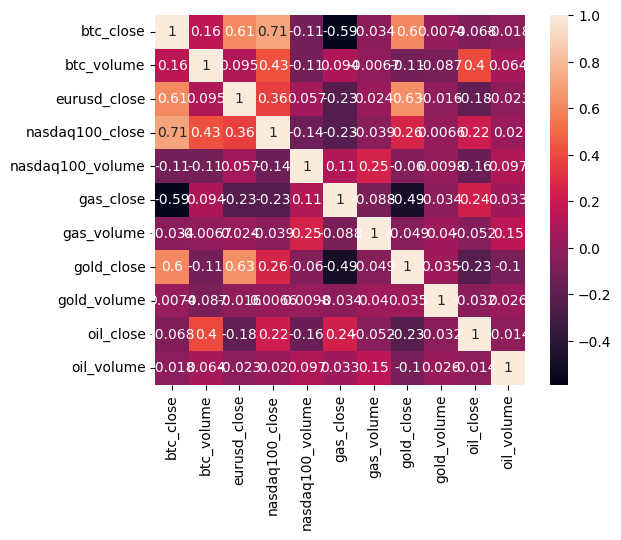

In [13]:
# Calculate the correlation for each feature
norm_corr = norm_df.corr()
sns.heatmap(norm_corr, square=True, annot=True)

<AxesSubplot:>

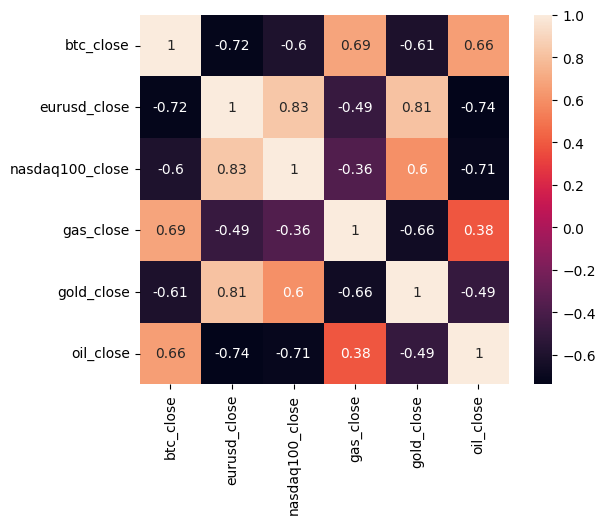

In [19]:
# Let's see only the past 1 month
close_columns = ['btc_close','eurusd_close','nasdaq100_close','gas_close','gold_close','oil_close']
norm_corr_past_1month = norm_df[close_columns].loc['2023-09-01':].corr()
sns.heatmap(norm_corr_past_1month, square=True, annot=True)

<AxesSubplot:>

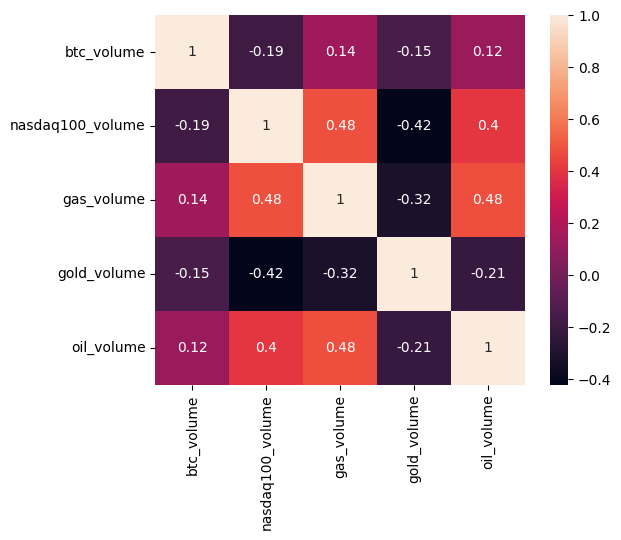

In [20]:
# Let's see only the past 1 month
volume_columns = ['btc_volume','nasdaq100_volume','gas_volume','gold_volume','oil_volume']
norm_corr_past_1month = norm_df[volume_columns].loc['2023-09-01':].corr()
sns.heatmap(norm_corr_past_1month, square=True, annot=True)

<AxesSubplot:>

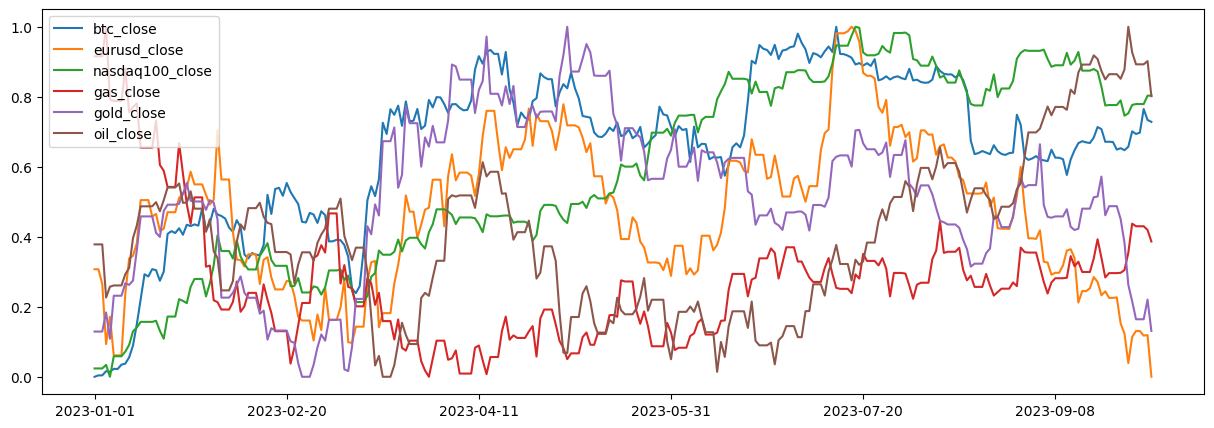

In [21]:
norm_df[close_columns].plot(figsize=[15,5])

<AxesSubplot:>

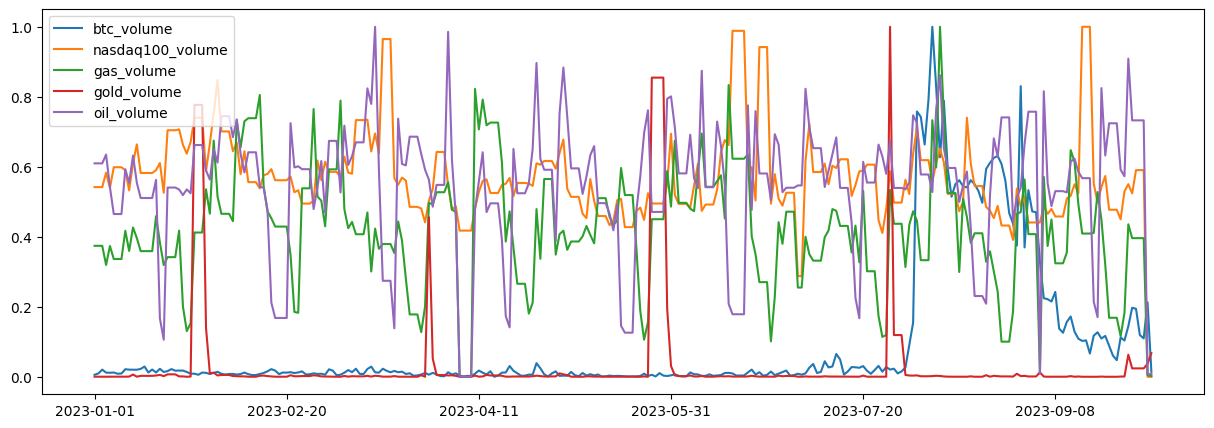

In [22]:
norm_df[volume_columns].plot(figsize=[15,5])

In the above, compare multiple prices of the same date.
What if compare N day bitcoin price and N-i day other features prices?

In [25]:
feature_columns = ['eurusd_close','nasdaq100_close','gas_close','gold_close','oil_close']
p1_close_price = norm_close_df[feature_columns].shift(1)
p3_close_price = norm_close_df[feature_columns].shift(3)
p5_close_price = norm_close_df[feature_columns].shift(5)
p7_close_price = norm_close_df[feature_columns].shift(7)
p10_close_price = norm_close_df[feature_columns].shift(10)

In [34]:
p1_norm_close_df = pd.concat([norm_close_df[['btc_close']],p1_close_price],axis=1).dropna()
p1_norm_close_df

,btc_close,eurusd_close,nasdaq100_close,gas_close,gold_close,oil_close
2023-01-02,0.003986,0.307270,0.023807,0.915635,0.129181,0.378248
2023-01-03,0.003970,0.307270,0.023807,0.915635,0.129181,0.378248
2023-01-04,0.015985,0.265250,0.023807,0.915635,0.129181,0.378248
2023-01-05,0.014296,0.093519,0.034034,1.000000,0.183946,0.226429
2023-01-06,0.022808,0.171616,0.000000,0.792756,0.108696,0.257238
...,...,...,...,...,...,...
2023-09-29,0.693736,0.113986,0.776755,0.437414,0.215719,0.926875
2023-09-30,0.697543,0.130845,0.779200,0.430078,0.164298,0.892725
2023-10-01,0.764949,0.130845,0.779200,0.430078,0.164298,0.892725
2023-10-02,0.733635,0.117647,0.779200,0.430078,0.164298,0.892725


<AxesSubplot:>

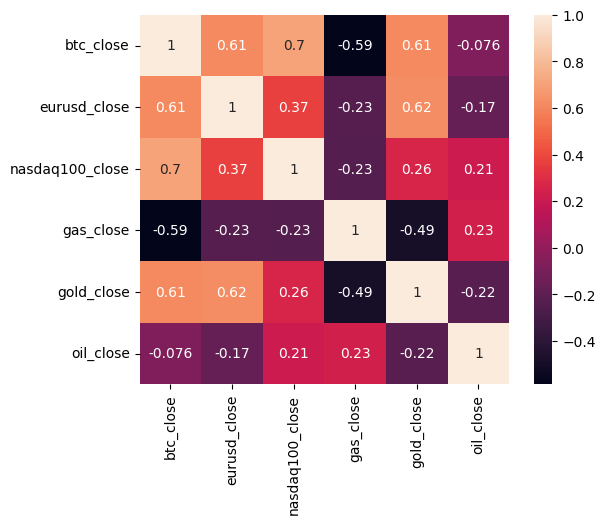

In [42]:
corr = p1_norm_close_df.corr()
sns.heatmap(corr, square=True, annot=True)

In [35]:
p3_norm_close_df = pd.concat([norm_close_df[['btc_close']],p3_close_price],axis=1).dropna()
p3_norm_close_df

,btc_close,eurusd_close,nasdaq100_close,gas_close,gold_close,oil_close
2023-01-04,0.015985,0.307270,0.023807,0.915635,0.129181,0.378248
2023-01-05,0.014296,0.307270,0.023807,0.915635,0.129181,0.378248
2023-01-06,0.022808,0.265250,0.023807,0.915635,0.129181,0.378248
2023-01-07,0.022112,0.093519,0.034034,1.000000,0.183946,0.226429
2023-01-08,0.034627,0.171616,0.000000,0.792756,0.108696,0.257238
...,...,...,...,...,...,...
2023-09-29,0.693736,0.123215,0.745983,0.304906,0.382943,0.877877
2023-09-30,0.697543,0.038993,0.752714,0.354425,0.262542,1.000000
2023-10-01,0.764949,0.113986,0.776755,0.437414,0.215719,0.926875
2023-10-02,0.733635,0.130845,0.779200,0.430078,0.164298,0.892725


<AxesSubplot:>

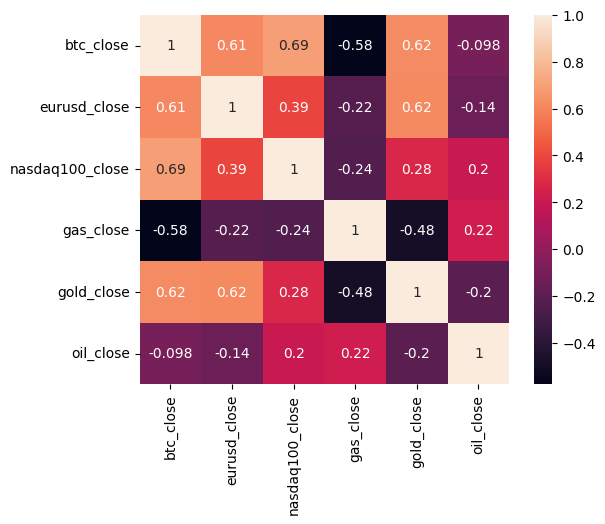

In [43]:
corr = p3_norm_close_df.corr()
sns.heatmap(corr, square=True, annot=True)

In [36]:
p5_norm_close_df = pd.concat([norm_close_df[['btc_close']],p5_close_price],axis=1).dropna()
p5_norm_close_df

,btc_close,eurusd_close,nasdaq100_close,gas_close,gold_close,oil_close
2023-01-06,0.022808,0.307270,0.023807,0.915635,0.129181,0.378248
2023-01-07,0.022112,0.307270,0.023807,0.915635,0.129181,0.378248
2023-01-08,0.034627,0.265250,0.023807,0.915635,0.129181,0.378248
2023-01-09,0.037610,0.093519,0.034034,1.000000,0.183946,0.226429
2023-01-10,0.055523,0.171616,0.000000,0.792756,0.108696,0.257238
...,...,...,...,...,...,...
2023-09-29,0.693736,0.226902,0.776427,0.296194,0.487458,0.864514
2023-09-30,0.697543,0.152304,0.789721,0.297111,0.450669,0.851522
2023-10-01,0.764949,0.123215,0.745983,0.304906,0.382943,0.877877
2023-10-02,0.733635,0.038993,0.752714,0.354425,0.262542,1.000000


<AxesSubplot:>

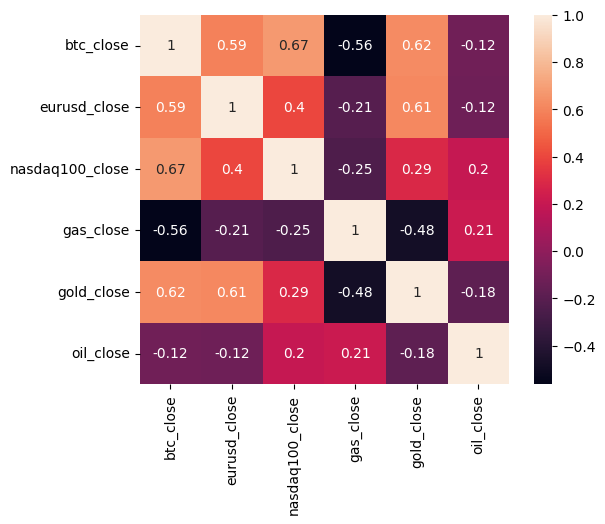

In [44]:
corr = p5_norm_close_df.corr()
sns.heatmap(corr, square=True, annot=True)

In [37]:
p7_norm_close_df = pd.concat([norm_close_df[['btc_close']],p7_close_price],axis=1).dropna()
p7_norm_close_df

,btc_close,eurusd_close,nasdaq100_close,gas_close,gold_close,oil_close
2023-01-08,0.034627,0.307270,0.023807,0.915635,0.129181,0.378248
2023-01-09,0.037610,0.307270,0.023807,0.915635,0.129181,0.378248
2023-01-10,0.055523,0.265250,0.023807,0.915635,0.129181,0.378248
2023-01-11,0.089206,0.093519,0.034034,1.000000,0.183946,0.226429
2023-01-12,0.150465,0.171616,0.000000,0.792756,0.108696,0.257238
...,...,...,...,...,...,...
2023-09-29,0.693736,0.225415,0.776427,0.296194,0.487458,0.864514
2023-09-30,0.697543,0.225415,0.776427,0.296194,0.487458,0.864514
2023-10-01,0.764949,0.226902,0.776427,0.296194,0.487458,0.864514
2023-10-02,0.733635,0.152304,0.789721,0.297111,0.450669,0.851522


<AxesSubplot:>

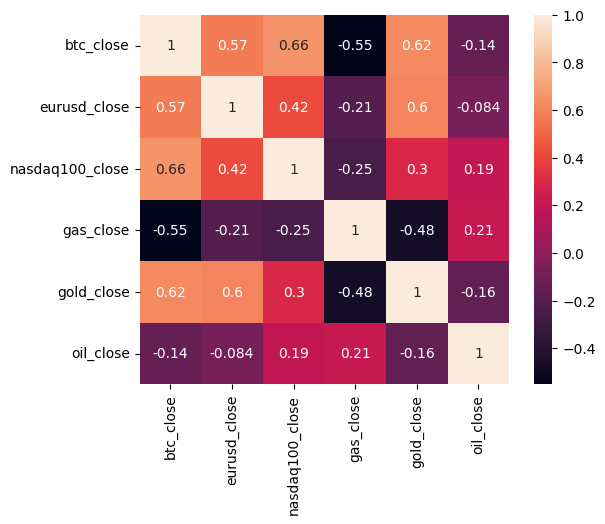

In [45]:
corr = p7_norm_close_df.corr()
sns.heatmap(corr, square=True, annot=True)

In [38]:
p10_norm_close_df = pd.concat([norm_close_df[['btc_close']],p10_close_price],axis=1).dropna()
p10_norm_close_df

,btc_close,eurusd_close,nasdaq100_close,gas_close,gold_close,oil_close
2023-01-11,0.089206,0.307270,0.023807,0.915635,0.129181,0.378248
2023-01-12,0.150465,0.307270,0.023807,0.915635,0.129181,0.378248
2023-01-13,0.222707,0.265250,0.023807,0.915635,0.129181,0.378248
2023-01-14,0.292902,0.093519,0.034034,1.000000,0.183946,0.226429
2023-01-15,0.286635,0.171616,0.000000,0.792756,0.108696,0.257238
...,...,...,...,...,...,...
2023-09-29,0.693736,0.270939,0.872529,0.392939,0.515050,0.907944
2023-09-30,0.697543,0.232857,0.829136,0.340211,0.571906,0.873794
2023-10-01,0.764949,0.244034,0.775082,0.283815,0.461538,0.849666
2023-10-02,0.733635,0.225415,0.776427,0.296194,0.487458,0.864514


<AxesSubplot:>

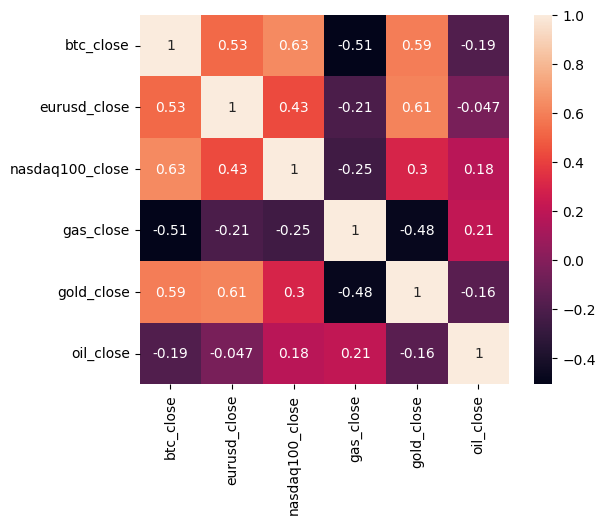

In [46]:
corr = p10_norm_close_df.corr()
sns.heatmap(corr, square=True, annot=True)